<a href="https://colab.research.google.com/github/akhwatfun/student-adaptability/blob/main/Modelling_Student_Adaptivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Membuat Pemodelan Student Adaptivity

Pada bagian ini kita akan membuat modelling dengan data yang sudah kita olah sebelumnya dengan file EDA

In [1]:
import numpy as np
import pandas as pd
import math
import random
import seaborn as sns
from scipy.stats import pearsonr, jarque_bera
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Memuat dataset yang sudah rapi ditahapan sebelumnya
data = "data.csv"
df = pd.read_csv(data, index_col=0)

df['Gender'] = df['Gender'].replace({'Boy': 1,
                                   'Girl': 0})
df['Age'] = df['Age'].replace({'1-5': 0,
                                '6-10': 1,
                                '11-15': 2,
                                '16-20': 3,
                                '21-25': 4,
                                '26-30': 5})
df['Education Level'] = df['Education Level'].replace({'School': 0,
                                       'College': 1,
                                       'University': 2})
df['Institution Type'] = df['Institution Type'].replace({'Non Government': 0,
                                       'Government': 1})
df['IT Student'] = df['IT Student'].replace({'No': 0,
                                       'Yes': 1})
df['Location'] = df['Location'].replace({'Yes': 1,
                                   'No': 0})
df['Load-shedding'] = df['Load-shedding'].replace({'Low': 0,
                                   'High': 1})
df['Financial Condition'] = df['Financial Condition'].replace({'Poor': 1,
                                     'Mid': 2,
                                     'Rich': 3})
df['Internet Type'] = df['Internet Type'].replace({'Mobile Data': 1,
                                   'Wifi': 2})
df['Network Type'] = df['Network Type'].replace({'2G': 1,
                                     '3G': 2,
                                     '4G': 3})
df['Class Duration'] = df['Class Duration'].replace({'0': 0,
                                  '1-3': 1,
                                  '3-6': 2})
df['Self LMS'] = df['Self LMS'].replace({'No': 0,
                                       'Yes': 1})
df['Device'] = df['Device'].replace({'Tab': 1,
                                     'Mobile': 2,
                                     'Computer': 3})
df['Adaptivity Level'] = df['Adaptivity Level'].replace({'Low': 0,
                                         'Moderate': 1,
                                         'High': 2})

# Memasukkan 7 variabel terpilih
variabel = ["Institution Type",  "Location",
                "Load-shedding", "Financial Condition", "Internet Type", "Network Type", "Class Duration"
                ]
analyze = df[variabel]

In [3]:
# Liat informasi dari dataset yang kita miliki
print(df.head())
print(df.columns)

   Gender  Age  Education Level  Institution Type  IT Student  Location  \
0       1    4                2                 0           0         1   
1       0    4                2                 0           0         1   
2       0    3                1                 1           0         1   
3       0    2                0                 0           0         1   
4       0    3                0                 0           0         1   

   Load-shedding  Financial Condition  Internet Type  Network Type  \
0              0                    2              2             3   
1              1                    2              1             3   
2              0                    2              2             3   
3              0                    2              1             3   
4              0                    1              1             2   

   Class Duration  Self LMS  Device  Adaptivity Level  
0               2         0       1                 1  
1               

**Memisahkan variabel dependen dan independen**

Variabel dependen yang digunakan adalah data pada kolom 'target', kolom feature merupakan variabel independen.

In [4]:
# Define X and y
X = df.loc[:, ~df.columns.isin(["Adaptivity Level"])]
y = df["Adaptivity Level"]

In [5]:
# Melihat kolom yang termasuk variable indepnden
X.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self LMS,Device
0,1,4,2,0,0,1,0,2,2,3,2,0,1
1,0,4,2,0,0,1,1,2,1,3,1,1,2
2,0,3,1,1,0,1,0,2,2,3,1,0,2
3,0,2,0,0,0,1,0,2,1,3,1,0,2
4,0,3,0,0,0,1,0,1,1,2,0,0,2


In [6]:
# Melihat variabel dependen
y.head()

0    1
1    1
2    1
3    1
4    0
Name: Adaptivity Level, dtype: int64

In [7]:
# Mendefinisikan standard scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
X_scaled

array([[ 0.8542422 ,  0.74051171,  0.96614445, ...,  1.59188267,
        -0.54122943, -2.77168489],
       [-1.17062819,  0.74051171,  0.96614445, ..., -0.07147228,
         1.84764529, -0.35000799],
       [-1.17062819, -0.12510928, -0.17363886, ..., -0.07147228,
        -0.54122943, -0.35000799],
       ...,
       [-1.17062819, -0.12510928, -0.17363886, ..., -0.07147228,
         1.84764529, -0.35000799],
       [ 0.8542422 ,  0.74051171,  0.96614445, ..., -0.07147228,
         1.84764529, -0.35000799],
       [ 0.8542422 ,  0.74051171,  0.96614445, ...,  1.59188267,
        -0.54122943,  2.07166891]])

**Spliting data**

Memisahkan dataset menjadi training dan testing dataset dengan perbandingan 80:20 dan random state 42

In [9]:
# Mendefinisikan pemisahan data
X_train, X_test, y_train, y_test = train_test_split(X_scaled , y, test_size=0.2, random_state=100)

# Menampilkan hasil pemisahan berdasarkan kolom dan baris
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(204, 13)
(52, 13)
(204,)
(52,)


**Pemodelan dengan Student Adaptivity Dataset**

Kita akan melakukan pemodelan untuk 9 model berbeda diantaranya logistic regression, decision tree, random forest, MLP, XGBoost, KNeighbors, QuadraticDiscriminantAnalysis, GaussianNB, SVC.

In [10]:
# Menyiapkan libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler



In [11]:
# pengalian informasi Logistik Regresi dan hitung akurasinya
clf = LogisticRegression()
# train the classifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# printing the test accuracy
print("The test accuracy score of Logistric Regression Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of Logistric Regression Classifier is  0.5961538461538461


In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.54      0.59        28
           1       0.55      0.67      0.60        24

    accuracy                           0.60        52
   macro avg       0.60      0.60      0.60        52
weighted avg       0.61      0.60      0.60        52



In [13]:
# pengalian informasi Decision Tree dan hitung akurasinya
clf = DecisionTreeClassifier()
# train the classifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# printing the test accuracy
print("The test accuracy score of Decision Tree Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of Decision Tree Classifier is  0.5192307692307693


In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.54      0.56        28
           1       0.50      0.50      0.50        24
           2       0.00      0.00      0.00         0

    accuracy                           0.52        52
   macro avg       0.36      0.35      0.35        52
weighted avg       0.54      0.52      0.53        52



In [15]:
# pengalian informasi Random Forest dan hitung akurasinya
clf = RandomForestClassifier()
# train the classifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# printing the test accuracy
print("The test accuracy score of Random Forest Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest Classifier is  0.5192307692307693


In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.50      0.54        28
           1       0.50      0.54      0.52        24
           2       0.00      0.00      0.00         0

    accuracy                           0.52        52
   macro avg       0.36      0.35      0.35        52
weighted avg       0.54      0.52      0.53        52



In [17]:
# pengalian informasi MLP dan hitung akurasinya
clf = MLPClassifier()
# train the classifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# printing the test accuracy
print("The test accuracy score of MLP Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of MLP Classifier is  0.5961538461538461


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.54      0.60        28
           1       0.55      0.67      0.60        24
           2       0.00      0.00      0.00         0

    accuracy                           0.60        52
   macro avg       0.41      0.40      0.40        52
weighted avg       0.62      0.60      0.60        52



In [19]:
# pengalian informasi XGBClassifier dan hitung akurasinya
clf = XGBClassifier()
# train the classifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# printing the test accuracy
print("The test accuracy score of XGB Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of XGB Classifier is  0.5769230769230769


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.57      0.60        28
           1       0.56      0.58      0.57        24
           2       0.00      0.00      0.00         0

    accuracy                           0.58        52
   macro avg       0.40      0.38      0.39        52
weighted avg       0.60      0.58      0.59        52



In [21]:
# pengalian informasi KNeighborsClassifier dan hitung akurasinya
clf = KNeighborsClassifier(n_neighbors=5)
# train the classifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# printing the test accuracy
print("The test accuracy score of KNeighbors Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of KNeighbors Classifier is  0.5384615384615384


In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.61      0.59        28
           1       0.50      0.46      0.48        24

    accuracy                           0.54        52
   macro avg       0.53      0.53      0.53        52
weighted avg       0.54      0.54      0.54        52



In [23]:
# pengalian informasi QuadraticDiscriminantAnalysis dan hitung akurasinya
clf = QuadraticDiscriminantAnalysis()
# train the classifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# printing the test accuracy
print("The test accuracy score of QuadraticDiscriminantAnalysis Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of QuadraticDiscriminantAnalysis Classifier is  0.5769230769230769


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.61      0.61        28
           1       0.62      0.54      0.58        24
           2       0.00      0.00      0.00         0

    accuracy                           0.58        52
   macro avg       0.41      0.38      0.39        52
weighted avg       0.61      0.58      0.59        52



In [25]:
# pengalian informasi GaussianNB dan hitung akurasinya
clf = GaussianNB()
# train the classifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# printing the test accuracy
print("The test accuracy score of GaussianNB Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of GaussianNB Classifier is  0.5384615384615384


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.61      0.62        28
           1       0.52      0.46      0.49        24
           2       0.00      0.00      0.00         0

    accuracy                           0.54        52
   macro avg       0.38      0.36      0.37        52
weighted avg       0.58      0.54      0.56        52



In [27]:
# pengalian informasi SVC dan hitung akurasinya
clf = SVC(kernel='linear')
# train the classifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# printing the test accuracy
print("The test accuracy score of SVC Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of SVC Classifier is  0.6153846153846154


In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.50      0.58        28
           1       0.56      0.75      0.64        24

    accuracy                           0.62        52
   macro avg       0.63      0.62      0.61        52
weighted avg       0.64      0.62      0.61        52



**Membandingkan hasil diatas**

Logistric Regression Classifier akurasi 0.60

Decision Tree Classifier akurasi 0.52

Random Forest Classifier akurasi 0.54

MLP Classifier akurasi 0.54

XGB Classifier akurasi 0.58

KNeighbors Classifier akurasi 0.54

QuadraticDiscriminantAnalysis Classifier akurasi 0.58

GaussianNB Classifier akurasi 0.54

SVC Classifier akurasi 0.62

Dari data di atas, kita akan analisa lebih lanjut Logistric Regression Classifier, XGB Classifier, QuadraticDiscriminantAnalysis Classifier, SVC Classifier

**Proses Hyperparameter Tuning**

In [29]:
# Logistic regression classifier with hyperparameter
clf = LogisticRegression()

param_grid1 = {
    'max_iter': [30, 50, 100, 150],
    'multi_class': ['auto'],
    'solver' : ['lbfgs', 'newton-cholesky']
}

gs1 = GridSearchCV(
        estimator= clf,
        param_grid = param_grid1,
        cv=5,
        n_jobs=-1,
        scoring='accuracy'
    )

fit_clf_lg = gs1.fit(X_train, y_train)

print(fit_clf_lg.best_score_)
print(fit_clf_lg.best_params_)

0.5734146341463415
{'max_iter': 30, 'multi_class': 'auto', 'solver': 'lbfgs'}


In [30]:
y_pred = fit_clf_lg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.54      0.59        28
           1       0.55      0.67      0.60        24

    accuracy                           0.60        52
   macro avg       0.60      0.60      0.60        52
weighted avg       0.61      0.60      0.60        52



Setelah dilakukan hyperparameter tuning model logistic regression tidak terjadi peningkatan pada nilai akurasi. Nilai akurasi tetap di angka 60%

In [31]:
# XGBClassifier with hyperparameter
clf = XGBClassifier(random_state=42)

param_grid1 = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

gs1 = GridSearchCV(
        estimator= clf,
        param_grid = param_grid1,
        cv=5,
        n_jobs=-1,
        scoring='accuracy'
    )

fit_clf_xgb = gs1.fit(X_train, y_train)

print(fit_clf_xgb.best_score_)
print(fit_clf_xgb.best_params_)

0.6273170731707317
{'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}


In [32]:
y_pred = fit_clf_xgb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.54      0.60        28
           1       0.59      0.71      0.64        24
           2       0.00      0.00      0.00         0

    accuracy                           0.62        52
   macro avg       0.42      0.41      0.41        52
weighted avg       0.64      0.62      0.62        52



Setelah dilakukan hyperparameter tuning model XGBoost terjadi peningkatan pada nilai akurasi. Nilai akurasi dari 58% menjadi 63%

In [33]:
# QuadraticDiscriminantAnalysis with hyperparameter
clf = QuadraticDiscriminantAnalysis()

param_grid1 = {}

gs1 = GridSearchCV(
        estimator= clf,
        param_grid = param_grid1,
        cv=5,
        n_jobs=-1,
        scoring='accuracy'
    )

fit_clf_qda = gs1.fit(X_train, y_train)

print(fit_clf_qda.best_score_)
print(fit_clf_qda.best_params_)

0.461219512195122
{}


In [34]:
y_pred = fit_clf_qda.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.61      0.61        28
           1       0.62      0.54      0.58        24
           2       0.00      0.00      0.00         0

    accuracy                           0.58        52
   macro avg       0.41      0.38      0.39        52
weighted avg       0.61      0.58      0.59        52



Setelah dilakukan hyperparameter tuning model QDA tidak terjadi peningkatan pada nilai akurasi. Nilai akurasi tetap di angka 58%

In [35]:
# SVC classifier with hyperparameter
clf = SVC(probability=True)

param_grid1 = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

gs1 = GridSearchCV(
        estimator= clf,
        param_grid = param_grid1,
        cv=5,
        n_jobs=-1,
        scoring='accuracy'
    )

fit_clf_svc = gs1.fit(X_train, y_train)

print(fit_clf_svc.best_score_)
print(fit_clf_svc.best_params_)

0.6076829268292683
{'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}


In [36]:
y_pred = fit_clf_svc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.54      0.59        28
           1       0.55      0.67      0.60        24

    accuracy                           0.60        52
   macro avg       0.60      0.60      0.60        52
weighted avg       0.61      0.60      0.60        52



Setelah dilakukan hyperparameter tuning model SVC terjadi penurunan pada nilai akurasi. Nilai akurasi dari 62% menjadi 60%. Ini artinya proses hyperparameter tuning pada SVC gagal

**ROC Analysis**

Kurva yang menyajikan ilustrasi performansi dari binary classifier system dalam menghasilkan sebuah prediksi

In [37]:
# Predict the probabilities for the positive class
y_pred_logreg = fit_clf_lg.predict_proba(X_test)[:, 1]
y_pred_xgb = fit_clf_xgb.predict_proba(X_test)[:, 1]
y_pred_qda= fit_clf_qda.predict_proba(X_test)[:, 1]
y_pred_svc= fit_clf_svc.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC scores
auc_logreg = roc_auc_score(y_test, y_pred_logreg)
auc_xgb = roc_auc_score(y_test, y_pred_xgb)
auc_qda = roc_auc_score(y_test, y_pred_qda)
auc_svc = roc_auc_score(y_test, y_pred_svc)

print(f"AUC-ROC for Logistic Regression: {auc_logreg}")
print(f"AUC-ROC for XGBoost: {auc_xgb}")
print(f"AUC-ROC for QuadraticDiscriminantAnalysis: {auc_qda}")
print(f"AUC-ROC for SVC: {auc_svc}")

AUC-ROC for Logistic Regression: 0.6755952380952381
AUC-ROC for XGBoost: 0.6309523809523809
AUC-ROC for QuadraticDiscriminantAnalysis: 0.636904761904762
AUC-ROC for SVC: 0.5833333333333333


Jika dilihat dari nilai AUC-ROC, model Logistic Regression memiliki nilai yang paling tinggi. Akan tetapi perbedaan nilai AUC-ROC Logistic Regression dengan 1 model lainnya tidak terpaut jauh.

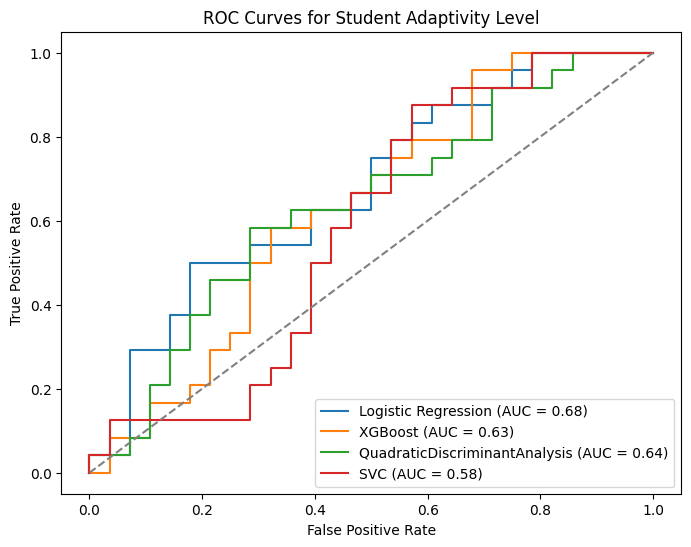

In [38]:
#Membuat ROC Analisis
def plot_roc_curves(y_test, y_pred_logreg, y_pred_xgb, y_pred_qda, y_pred_svc):
    plt.figure(figsize=(8, 6))

    # Calculate ROC curves for each model
    fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_logreg)
    fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb)
    fpr_qda, tpr_qda, _ = roc_curve(y_test, y_pred_qda)
    fpr_svc, tpr_svc, _ = roc_curve(y_test, y_pred_svc)

    # Plot ROC curves
    plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')
    plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')
    plt.plot(fpr_qda, tpr_qda, label=f'QuadraticDiscriminantAnalysis (AUC = {auc_qda:.2f})')
    plt.plot(fpr_svc, tpr_svc, label=f'SVC (AUC = {auc_svc:.2f})')

    # Plot random classifier
    plt.plot([0,1], [0,1], linestyle="--", color="gray")

    # Format the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Student Adaptivity Level')
    plt.legend()
    plt.show()

plot_roc_curves(y_test, y_pred_logreg, y_pred_xgb, y_pred_qda, y_pred_svc)

In [39]:
#ROC Analysis Graph untuk menentukan treshold'''
def find_rates_for_thresholds(y_test, y_pred, threshold):
    fpr_list = []
    tpr_list = []
    for threshold in thresholds:
        y_pred_binary = (y_pred > threshold).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()
        fpr = fp / (fp + tn)
        tpr = tp / (tp + fn)
        fpr_list.append(fpr)
        tpr_list.append(tpr)
    return fpr_list, tpr_list

thresholds = np.arange(0, 1.1, 0.1)

fpr_logreg, tpr_logreg = find_rates_for_thresholds(y_test, y_pred_logreg, thresholds)
fpr_xgb, tpr_xgb = find_rates_for_thresholds(y_test, y_pred_xgb, thresholds)
fpr_qda, tpr_qda = find_rates_for_thresholds(y_test, y_pred_qda, thresholds)
fpr_svc, tpr_svc = find_rates_for_thresholds(y_test, y_pred_svc, thresholds)

'''TODO: Silahkan buat Summary DataFrame'''
summary_df = pd.DataFrame({
    'Threshold' : thresholds,
    'FPR_logreg' : fpr_logreg,
    'FPR_XGB' : fpr_xgb,
    'FPR_QDA' : fpr_qda,
    'FPR_SVC' : fpr_svc,
    'TPR_logreg' : tpr_logreg,
    'TPR_XGB' : tpr_xgb,
    'TPR_QDA' : tpr_qda,
    'TPR_SVC' : tpr_svc,
})

print(summary_df)

    Threshold  FPR_logreg   FPR_XGB   FPR_QDA   FPR_SVC  TPR_logreg   TPR_XGB  \
0         0.0    1.000000  1.000000  1.000000  1.000000    1.000000  1.000000   
1         0.1    0.857143  0.678571  0.571429  0.964286    1.000000  0.916667   
2         0.2    0.642857  0.678571  0.428571  0.678571    0.875000  0.875000   
3         0.3    0.607143  0.571429  0.357143  0.571429    0.875000  0.791667   
4         0.4    0.571429  0.464286  0.321429  0.535714    0.833333  0.666667   
5         0.5    0.285714  0.321429  0.285714  0.392857    0.500000  0.541667   
6         0.6    0.142857  0.250000  0.285714  0.321429    0.333333  0.291667   
7         0.7    0.071429  0.107143  0.250000  0.035714    0.166667  0.166667   
8         0.8    0.000000  0.035714  0.178571  0.000000    0.041667  0.041667   
9         0.9    0.000000  0.000000  0.142857  0.000000    0.000000  0.000000   
10        1.0    0.000000  0.000000  0.000000  0.000000    0.000000  0.000000   

     TPR_QDA   TPR_SVC  
0 

In [40]:
#ROC Analysis Graph untuk menentukan best treshold'''
def find_best_threshold(y_test, y_pred):
    # based on Youden's Index
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    optimal_idx = np.argmax(tpr - fpr)
    return thresholds[optimal_idx]

best_threshold_logreg = find_best_threshold(y_test, y_pred_logreg)
best_threshold_xgb = find_best_threshold(y_test, y_pred_xgb)
best_threshold_qda = find_best_threshold(y_test, y_pred_qda)
best_threshold_svc = find_best_threshold(y_test, y_pred_svc)

print(f"Best threshold for Logistic Regression: {best_threshold_logreg}")
print(f"Best threshold for XGBoost: {best_threshold_xgb}")
print(f"Best threshold for QuadraticDiscriminantAnalysis: {best_threshold_qda}")
print(f"Best threshold for SVC: {best_threshold_svc}")

Best threshold for Logistic Regression: 0.5444749696626747
Best threshold for XGBoost: 0.045841969549655914
Best threshold for QuadraticDiscriminantAnalysis: 0.4316199006525323
Best threshold for SVC: 0.31113495439801137


Jadi dapat disimpulkan, bahwa model yang peformanya lebih bagus ialah model Logistic Regression dengan ditandai dengan model Logistic Regression yang memiliki nilai akurasi pada classification sebesar 60% dan memiliki score AUC-ROC Terbesar dibandingkan 3 model lainnya, yaitu sebesar 68%, namun model ini memiliki treshold yang tinggi dimana akan meningkatkan FPR (Kasus negatif yang salah diprediksi positif).

In [41]:
import pickle
# Menyimpan model terbaik dengan pickle
pklname = "best_model_logreg.pkl"

with open(pklname, 'wb') as file:
    pickle.dump(fit_clf_lg, file)

Copyright © DQlab Academy x Fitri Rachmawati